# Künstliche neuronale Netze
## Einstieg in die KI mithilfe von Bilderkennung 

![Alternative text](https://raw.githubusercontent.com/heitzlki/NeuralNetworkMNIST/main/assets/nn_example.png)
*Dake Mysid, Wikipedia*


![Alternative text](https://raw.githubusercontent.com/heitzlki/NeuralNetworkMNIST/main/assets/title.webp)
*Photo by Pop & Zebra on Unsplash*

# MNIST

---

- [link](http://yann.lecun.com/exdb/mnist/)
- **M**odified **N**ational **I**nstitute of **S**tandards and **T**echnology database
- Datenbank bestehend aus handgeschriebenen Zahlen (0-9)
- 60.000 Trainingsbilder
- 10.000 Testbilder
- 28 × 28 Pixel Graustufen-Bilder
- Einsteigerbeispiel für maschinelles Lernen / `Hello World!` für Bilderkennung
---

![MNIST Beispiel](https://raw.githubusercontent.com/heitzlki/NeuralNetworkMNIST/main/assets/mnist_example.png)
*Josef Steppan, Wkipedia*

---

# Bibliotheken und Werkzeuge:

- Jupyter Notebooks: Interaktives Entwicklungswerkzeug zum Kombinieren von Code, Text und Visualisierungen in einem Dokument.
- Pandas: Leistungsstarke Bibliothek für Datenmanipulation und -analyse, ideal für tabellarische Daten.
- Numpy: Grundlegende Bibliothek für numerische Berechnungen mit effizienten Datenstrukturen.
- Matplotlib: Bibliothek zur Erstellung von Diagrammen und Visualisierungen in Python.

---

In [159]:
!pip install pandas matplotlib numpy tqdm

Defaulting to user installation because normal site-packages is not writeable


In [160]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [236]:
import os  # Importiere das Modul "os" für Betriebssystemoperationen

path = f"{os.path.dirname(os.path.abspath('__file__'))}/data/train.csv"  # Setze den Pfad zur CSV-Datei "train.csv"
# Die Funktionen `dirname` und `abspath` von `os.path` werden verwendet, um den absoluten Pfad des aktuellen Skripts zu erhalten
# und das Verzeichnis dieses Skripts zu extrahieren. Der Pfad wird dann mit dem Unterverzeichnis "data" und dem Dateinamen "train.csv" kombiniert.

data = pd.read_csv(path)  # Lade die Daten aus der CSV-Datei in ein Pandas DataFrame-Objekt
# Die Funktion `read_csv` von Pandas wird verwendet, um die Daten in das DataFrame zu lesen.

print(data.head())  # Gib die ersten paar Zeilen des DataFrames aus
# Die Methode `head()` wird auf dem DataFrame aufgerufen, um eine Vorschau der Daten anzuzeigen.


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

---

In [162]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

---

Die Variable `data` wird in ein NumPy Array umgewandelt. Dadurch können wir mit den Daten effizienter arbeiten, da NumPy leistungsstarke Funktionen für numerische Berechnungen bietet.

In [163]:
data = np.array(data)
print(data)

[[2 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Die Anzahl der Zeilen (`m`) und die Anzahl der Spalten (`n`) des `data` Arrays werden den Variablen `m` und `n` zugewiesen.

In [164]:
m, n = data.shape
print(f"data.shape: {data.shape}")
print(f"m: {m}")
print(f"n: {n}")

data.shape: (42000, 785)
m: 42000
n: 785


Das `data` Array wird vor dem Aufteilen in Entwicklungs- und Trainingssets zufällig durcheinandergewürfelt. Dadurch wird sichergestellt, dass die Daten in einer zufälligen Reihenfolge vorliegen, um mögliche Muster zu vermeiden.

In [165]:
print(f"Data vor `random.shuffle`:\n{data}")
np.random.shuffle(data)
print(f"Data nach `random.shuffle`:\n{data}")

Data vor `random.shuffle`:
[[2 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Data nach `random.shuffle`:
[[7 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]]


Die ersten 1000 Zeilen des `data` Arrays werden in das `data_dev` Array kopiert und transponiert (`T`). Dadurch werden die Daten für das Entwicklungssatz-Subset vorbereitet.

In [166]:
data_dev = data[0:1000].T
print(f"Data_dev:\n{data_dev}")

Data_dev:
[[7 1 5 ... 4 6 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Die erste Spalte (`Y_dev`) und die Spalten 1 bis `n` (`X_dev`) des `data_dev` Arrays werden in separate Arrays für die Zielvariablen (Label von Zahlen) und die Eingabevariablen (Pixel von Zahlen) im Entwicklungssatz aufgeteilt.

In [167]:
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
print(f"Y_dev:\n{Y_dev}")
print(f"X_dev:\n{X_dev}")

Y_dev:
[7 1 5 9 6 7 8 1 9 0 7 7 4 7 0 6 9 3 7 9 7 6 1 7 2 1 3 6 2 5 0 4 8 9 6 7 3
 2 4 4 8 9 3 5 2 8 2 6 6 4 8 1 0 4 0 4 4 1 7 1 3 4 7 4 1 1 5 8 6 2 7 5 7 8
 5 3 5 7 0 0 8 8 0 2 6 8 9 3 5 9 2 9 0 7 8 2 3 7 7 0 3 7 1 8 0 4 9 0 1 8 3
 6 1 3 7 5 9 5 5 0 5 9 4 8 7 5 0 8 0 3 6 0 0 7 6 5 3 1 7 1 7 1 2 4 8 8 4 3
 1 2 4 2 1 3 4 1 9 8 9 5 9 5 4 7 7 6 0 8 3 7 0 7 8 4 1 7 8 7 5 8 2 0 2 2 9
 7 2 8 9 0 4 5 1 0 9 7 0 3 1 5 2 8 1 9 7 2 2 1 7 7 8 1 7 4 2 8 1 5 8 7 7 6
 6 2 1 4 0 2 5 9 1 3 8 9 8 9 8 7 8 8 7 5 7 4 0 1 4 7 6 1 2 0 2 4 2 0 8 4 7
 6 5 7 8 2 3 5 0 9 0 3 4 6 2 6 6 5 3 2 4 7 5 3 5 1 3 7 0 6 7 8 9 3 5 5 7 7
 9 9 4 3 2 3 5 0 1 0 6 9 3 9 7 1 3 3 5 7 2 3 0 0 9 8 0 5 8 6 7 7 4 3 9 6 7
 1 9 8 9 8 9 1 9 6 5 6 9 9 8 2 0 9 1 4 0 0 1 8 8 1 2 0 1 3 4 5 9 9 8 9 4 6
 7 9 1 9 7 1 3 6 0 0 5 6 0 7 0 2 5 9 7 3 0 7 7 6 5 8 1 1 1 6 3 1 8 2 3 7 2
 9 9 4 2 5 7 1 0 6 4 3 1 3 5 8 6 5 8 8 6 3 3 6 4 1 1 1 0 0 1 5 4 4 4 6 4 1
 2 5 9 3 2 9 2 8 6 5 0 0 8 8 5 0 3 8 4 8 9 0 7 3 5 4 6 9 6 1 1 0 0 4 3 3 1
 3 9 7 7 3 1 5 2 9

Die Werte in `X_dev` werden durch 255 dividiert, um sie auf den Bereich von 0 bis 1 zu normalisieren. Dies ist häufig bei Bildverarbeitungsaufgaben der Fall, um die Skalierung der Pixelwerte anzupassen.

In [168]:
X_dev = X_dev / 255.
print(f"X_dev:\n{X_dev}\n\n")

print(f"Beispiel: {data[0]}")
print(f"Beispiel nach normalisierung: {data[0]/255}")

X_dev:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Beispiel: [  7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  64   0  64 128  64 128  64 128 128 191   0   0   0   0   0   0   0   0
   0   0   0   0   0  

Selbige umwandlungschritte erfolgen auch auf Trainingsdaten.

In [169]:
data_train = data[1000:m].T  # Die Zeilen von Index 1000 bis zum Ende des 'data'-Arrays werden in das 'data_train'-Array kopiert und transponiert.

Y_train = data_train[0]  # Die erste Spalte des 'data_train'-Arrays wird dem 'Y_train'-Array zugewiesen.
X_train = data_train[1:n]  # Die Spalten 1 bis 'n' des 'data_train'-Arrays werden dem 'X_train'-Array zugewiesen.

X_train = X_train / 255.  # Die Werte in 'X_train' werden durch 255 geteilt, um sie auf den Bereich von 0 bis 1 zu normalisieren.

_, m_train = X_train.shape  # Die Anzahl der Zeilen des 'X_train'-Arrays wird der Variable 'm_train' zugewiesen.

---

In [170]:
data = np.array(data)  # Das 'data'-Array wird in ein NumPy-Array umgewandelt.

m, n = data.shape  # Die Anzahl der Zeilen ('m') und Spalten ('n') des 'data'-Arrays werden den Variablen zugewiesen.

np.random.shuffle(data)  # Das 'data'-Array wird vor der Aufteilung in Entwicklungs- und Trainingssätze zufällig durcheinandergewürfelt.

data_dev = data[0:1000].T  # Die ersten 1000 Zeilen des 'data'-Arrays werden in das 'data_dev'-Array kopiert und transponiert.

Y_dev = data_dev[0]  # Die erste Spalte des 'data_dev'-Arrays wird dem 'Y_dev'-Array zugewiesen.
X_dev = data_dev[1:n]  # Die Spalten 1 bis 'n' des 'data_dev'-Arrays werden dem 'X_dev'-Array zugewiesen.

X_dev = X_dev / 255.  # Die Werte in 'X_dev' werden durch 255 geteilt, um sie auf den Bereich von 0 bis 1 zu normalisieren.

data_train = data[1000:m].T  # Die Zeilen von Index 1000 bis zum Ende des 'data'-Arrays werden in das 'data_train'-Array kopiert und transponiert.

Y_train = data_train[0]  # Die erste Spalte des 'data_train'-Arrays wird dem 'Y_train'-Array zugewiesen.
X_train = data_train[1:n]  # Die Spalten 1 bis 'n' des 'data_train'-Arrays werden dem 'X_train'-Array zugewiesen.

X_train = X_train / 255.  # Die Werte in 'X_train' werden durch 255 geteilt, um sie auf den Bereich von 0 bis 1 zu normalisieren.

_, m_train = X_train.shape  # Die Anzahl der Zeilen des 'X_train'-Arrays wird der Variable 'm_train' zugewiesen.



---

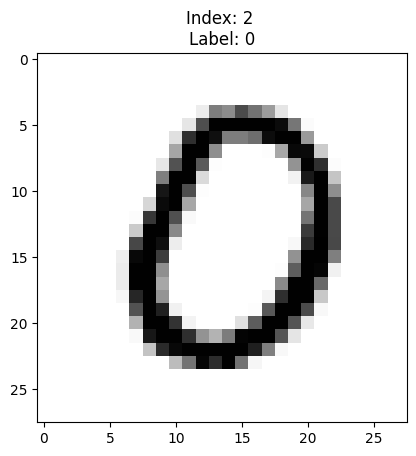

In [171]:
def show_image(index = 0):
    current_image = X_train[:, index, None]
    label = Y_train[index]

    current_image = current_image.reshape((28, 28))
    plt.imshow(current_image, interpolation='nearest', cmap="Greys")
    plt.title(f"Index: {index} \nLabel: {label}")
    plt.show()

#int(input("Enter a number (0 - 59999): "))
show_image(2)

---

# Aufbau des Neuronalen Netzes

![MNIST Beispiel](https://raw.githubusercontent.com/heitzlki/NeuralNetworkMNIST/main/assets/nn1.png)

- Input Layer [0]:
    - Nodes im input layer: 784 (28x28 Pixel)
    - Normalisierung (Wert / 255) der Eingabewerte (0 -> schwarz, 255 -> weiß)

<br>

- Hidden Layer [1]:
    - Nodes im hidden layer: 10
    - Berechnung von Node Wert im Hidden Layer
    - ReLU-Aktivierung

<br>

- Output Layer [2]:
    - Nodes im output layer: 10 (Zahlen 0-9)
    - Berechnung von Node Wert
    - Softmax-Aktivierung

---

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1

---

**Forward propagation**

$$Z^{[1]} = W^{[1]} A^{[0]} + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $b^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[2]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $b^{[2]}$: 10 x 1


In [172]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

W1, b1, W2, b2 = init_params()
print(f"W1.shape: {W1.shape}")
print(f"b1.shape: {b1.shape}")
print(f"W2.shape: {W2.shape}")
print(f"b2.shape: {b2.shape}")

print(f"W1:\n{W1}")
print(f"b1:\n{b1}")
print(f"W2:\n{W2}")
print(f"b2:\n{b2}")


W1.shape: (10, 784)
b1.shape: (10, 1)
W2.shape: (10, 10)
b2.shape: (10, 1)
W1:
[[-0.14197434  0.49317808  0.16045962 ...  0.23968672 -0.44861517
   0.49692698]
 [-0.06799175  0.46149486 -0.24496155 ... -0.4767191  -0.05868748
  -0.19306051]
 [ 0.12095084  0.16225093  0.29715186 ... -0.24349541  0.33039368
   0.30536423]
 ...
 [ 0.10413786 -0.20014319 -0.10331896 ...  0.31852451 -0.27651825
   0.16035645]
 [ 0.04944221 -0.09464702 -0.48788859 ...  0.43592554  0.04171022
   0.49313123]
 [-0.26588839 -0.11889829  0.1580769  ... -0.10060762 -0.00282091
   0.29175613]]
b1:
[[ 0.11486179]
 [ 0.22237593]
 [-0.20981025]
 [-0.1964708 ]
 [ 0.41654233]
 [ 0.22750604]
 [-0.05621821]
 [ 0.28187749]
 [ 0.06919889]
 [ 0.06791656]]
W2:
[[ 0.07507167 -0.36502945  0.1976673  -0.0660388   0.41634486  0.15701612
  -0.28211909 -0.21291887  0.41247877  0.164329  ]
 [ 0.01206111  0.16518014  0.32238903 -0.24255593  0.32498526 -0.02442699
  -0.30171548 -0.20291277  0.48628866 -0.48156815]
 [-0.14114748  0.052

In [173]:
def plot_function_graph(start = -10, end = 10, function = lambda x: x):
    fig, ax = plt.subplots()

    # Draw horizontal line at y=0
    ax.axhline(0, color='black')

    # Draw vertical line at x=0
    ax.axvline(0, color='black')

    # Set the x and y limits
    ax.set_xlim(start, end)
    ax.set_ylim(start, end)

    y_ticks = np.arange(start, end, 1)
    ax.set_yticks(y_ticks)

    x_ticks = np.arange(start, end, 1)
    ax.set_xticks(x_ticks)

    plt.grid(linestyle='--', )

    

    x = np.linspace(start, end, 100)
    plt.plot(x, function(x), linewidth=2)
    plt.title(function.__name__)
    plt.show()


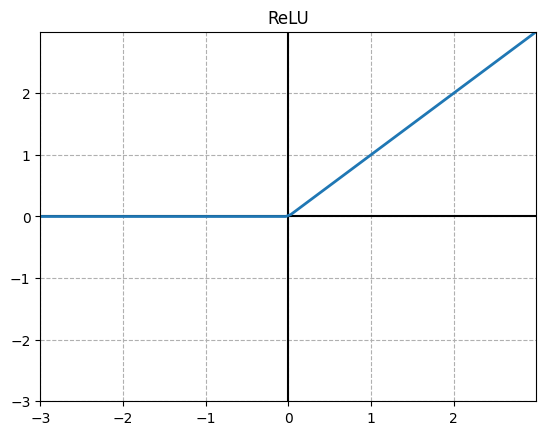

In [174]:
def ReLU(Z):
    return np.maximum(Z, 0)

plot_function_graph(-3, 3, ReLU)

In [175]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

x = np.array([1.0, 2.0, 3.0])
print(f"x: {x}")
print(f"np.exp(x): {np.exp(x)}")
print(f"sum(np.exp(x)): {sum(np.exp(x))}")
print(f"softmax(x): {softmax(x)}")


x: [1. 2. 3.]
np.exp(x): [ 2.71828183  7.3890561  20.08553692]
sum(np.exp(x)): 30.19287485057736
softmax(x): [0.09003057 0.24472847 0.66524096]


![nn4](https://raw.githubusercontent.com/heitzlki/NeuralNetworkMNIST/main/assets/nn4.png)

In [176]:
def forward_prop(W1, b1, W2, b2, X):
    print(f"W1: {W1}")
    print(f"b1: {b1}")
    print(f"W2: {W2}")
    print(f"b2: {b2}")
    # print(f"X: {X}")
    Z1 = W1.dot(X) + b1
    print(f"Z1: {Z1}")
    A1 = ReLU(Z1)
    print(f"A1: {A1}")
    Z2 = W2.dot(A1) + b2
    print(f"Z2: {Z2}")
    A2 = softmax(Z2)
    print(f"A2: {A2}")
    return Z1, A1, Z2, A2


def get_predictions(A2):
    return np.argmax(A2, 0)

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)[0]
    label = Y_train[index]

    current_image = current_image.reshape((28, 28))
    plt.imshow(current_image, interpolation='nearest', cmap="Greys")
    plt.title(f"Index: {index} \nLabel: {label}\nPrediction: {prediction}")
    plt.show()

W1, b1, W2, b2 = init_params()

W1: [[-0.08755337  0.27660825  0.45600978 ...  0.04021789 -0.36225689
   0.28567563]
 [ 0.37136411 -0.35140748 -0.16877267 ... -0.27203751 -0.29593948
  -0.3115458 ]
 [-0.29059575  0.05811534 -0.12008103 ...  0.41463199  0.0227991
   0.02432578]
 ...
 [-0.43885659 -0.413107    0.07600725 ... -0.06959924 -0.01066805
   0.48501326]
 [ 0.23980515 -0.3881328  -0.10361576 ...  0.25403458 -0.43635347
  -0.25252895]
 [ 0.21589835 -0.03248763 -0.31288829 ... -0.46319937  0.00809646
  -0.23647241]]
b1: [[-0.00969619]
 [ 0.06688393]
 [ 0.46746667]
 [-0.18999548]
 [-0.17660764]
 [-0.27084023]
 [-0.40709058]
 [ 0.03976617]
 [ 0.18115055]
 [ 0.28679429]]
W2: [[ 4.46315349e-01  1.39342788e-01 -2.04639432e-01 -2.61814000e-02
   3.38140427e-01 -4.95382310e-01 -4.90370728e-01 -2.00782198e-01
   7.97293748e-02 -4.64190864e-02]
 [-1.14833109e-01  3.41319788e-01  1.29212965e-01 -1.12480188e-01
  -1.82926714e-01  4.56656219e-01 -4.91556916e-01 -4.87732424e-02
   2.17364434e-01 -4.94099049e-01]
 [ 3.1775609

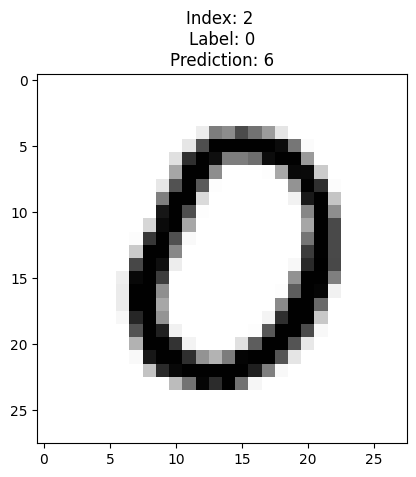

In [177]:
test_prediction(2, W1, b1, W2, b2)

---

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1

In [200]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


def ReLU_deriv(Z):
    """
    Die Funktion `ReLU_deriv` berechnet die Ableitung der ReLU-Aktivierungsfunktion.
    Sie nimmt eine Matrix `Z` als Eingabe und gibt eine Matrix zurück, bei der jeder 
    Eintrag den Wert `True` hat, wenn der entsprechende Eintrag in `Z` größer als 0 
    ist, andernfalls den Wert `False`.
    """
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    # print(f"one_hot_Y.shape: {one_hot_Y.shape}")
    # print(f"one_hot_Y: {one_hot_Y}")

    dZ2 = A2 - one_hot_Y  # Berechnet die Ableitung des Verlusts bezüglich der Aktivierung im Output Layer.
    # print(f"dZ2.shape: {dZ2.shape}")
    # print(f"dZ2: {dZ2}")
    dW2 = 1 / m * dZ2.dot(A1.T) # Berechnet die Ableitung des Verlusts bezüglich der Gewichtsmatrix im Output Layer.
    # print(f"dW2.shape: {dW2.shape}")
    # print(f"dW2: {dW2}")
    db2 = 1 / m * np.sum(dZ2)  # Berechnet die Ableitung des Verlusts bezüglich des Bias-Vektors im Output Layer.
    # print(f"db2.shape: {db2.shape}")
    # print(f"db2: {db2}")

    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1) # Berechnet die Ableitung des Verlusts bezüglich der Aktivierung im Hidden Layer.
    # print(f"dZ1.shape: {dZ1.shape}")
    # print(f"dZ1: {dZ1}")
    dW1 = 1 / m * dZ1.dot(X.T) # Berechnet die Ableitung des Verlusts bezüglich der Gewichtsmatrix im Hidden Layer.
    # print(f"dW1.shape: {dW1.shape}")
    # print(f"dW1: {dW1}")
    db1 = 1 / m * np.sum(dZ1) # Berechnet die Ableitung des Verlusts bezüglich des Bias-Vektors im Hidden Layer.
    # print(f"db1.shape: {db1.shape}")
    # print(f"db1: {db1}")
    return dW1, db1, dW2, db2




def test_backward_prop(index, W1, b1, W2, b2):
    X = X_train#[:, index, None]
    print(f"X.shape: {X.shape}")
    # print(f"X: {X}")
    Y = Y_train #[:, index, None]
    # print(f"Y.shape: {Y.shape}")
    # print(f"Y: {Y}")
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)

W1, b1, W2, b2 = init_params()
test_backward_prop(0, W1, b1, W2, b2)

X.shape: (784, 41000)


In [201]:
# Beispiel-Klassenlabels
Y = np.array([0, 1, 2, 3, 4, 3, 2, 1, 0])

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# Anwendung der one_hot-Funktion
one_hot_Y = one_hot(Y)

# Ausgabe des Ergebnisses
print(one_hot_Y)

[[1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [229]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    accuracies = []
    for i in range(iterations):

        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        accuracies.append(get_accuracy(get_predictions(A2), Y))

        if i % 10 == 0:
            print(f"[{i}]: {accuracies[-1]}")
    
    return W1, b1, W2, b2, accuracies

In [233]:
W1, b1, W2, b2, accuracies = gradient_descent(X_train, Y_train, 0.10, 500)

[0]: 0.11534146341463415
[10]: 0.21948780487804878
[20]: 0.30246341463414633
[30]: 0.40058536585365856
[40]: 0.46626829268292685
[50]: 0.5098536585365854
[60]: 0.5430975609756098
[70]: 0.569
[80]: 0.5905853658536585
[90]: 0.6088292682926829
[100]: 0.625780487804878
[110]: 0.640390243902439
[120]: 0.655219512195122
[130]: 0.6671951219512195
[140]: 0.6797560975609757
[150]: 0.6907317073170731
[160]: 0.7009512195121951
[170]: 0.7103170731707317
[180]: 0.7191951219512195
[190]: 0.7277073170731707
[200]: 0.7350731707317073
[210]: 0.7419756097560976
[220]: 0.747609756097561
[230]: 0.753390243902439
[240]: 0.7590975609756098
[250]: 0.7648048780487805
[260]: 0.7691219512195122
[270]: 0.773609756097561
[280]: 0.7780731707317073
[290]: 0.782219512195122
[300]: 0.7862682926829269
[310]: 0.7898048780487805
[320]: 0.7930975609756098
[330]: 0.795829268292683
[340]: 0.7985365853658537
[350]: 0.8014634146341464
[360]: 0.8043902439024391
[370]: 0.8067317073170732
[380]: 0.809
[390]: 0.8112439024390244


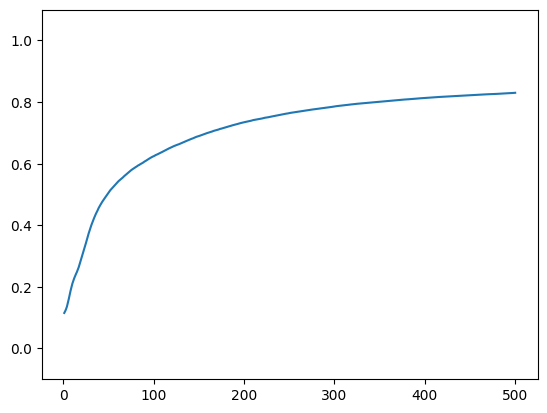

In [234]:
def plot(y):
  x = [i for i in range(1, len(y) + 1)]
  fig, ax = plt.subplots()
  plt.ylim(-0.1, 1.1)
  ax.plot(x, y)
  plt.show()


plot(accuracies)

In [235]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

0.826